In [32]:
import pandas as pd
import numpy as np
import random
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
# Load dataset
data = pd.read_csv('bank.csv')
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [35]:

# Overview of the dataset
# 1. Display basic information about the dataset including column names and types
print("Dataset Information:")
print(data.info())
print()
print()
# 2. Display summary statistics of the numerical features
print("\nSummary Statistics:")
print(data.describe())
print()
print()
# 3. Check for missing values in each column
print("\nMissing Values per Column:")
print(data.isnull().sum())  # Check for missing values
print()
print()
# Get the dataset features
data.columns


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None



Summary Statistics:
               age       balance          day     

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [36]:
# Dataset shape
print(data.shape)
print()
# Separate numerical and categorical features from the dataset
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Print the names of numerical and categorical features
print("Numerical Features:")
print(numerical_features)
print()
print("Categorical Features:")
print(categorical_features)

(4521, 17)

Numerical Features:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Categorical Features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


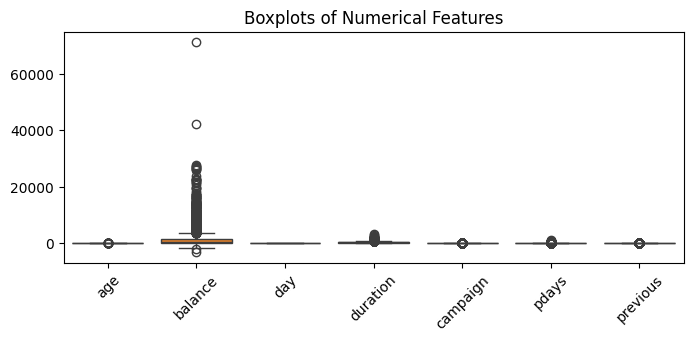

In [37]:
# Plot boxplots for each numerical feature
plt.figure(figsize=(8, 3))
sn.boxplot(data=data.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

In [38]:

# Assume 'data' is your DataFrame and 'balance' is the feature
skewed_features = ['balance']

# Make sure there are no non-positive values before taking the log
for feature in skewed_features:
    if data[feature].min() <= 0:
        data[feature] = data[feature] + abs(data[feature].min()) + 1
    data[feature] = np.log1p(data[feature])


# Handle outliers using IQR (Interquartile Range) for 'duration' column
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1

# Cap values beyond 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['duration'] = np.where(data['duration'] > upper_bound, upper_bound,
                   np.where(data['duration'] < lower_bound, lower_bound, data['duration']))


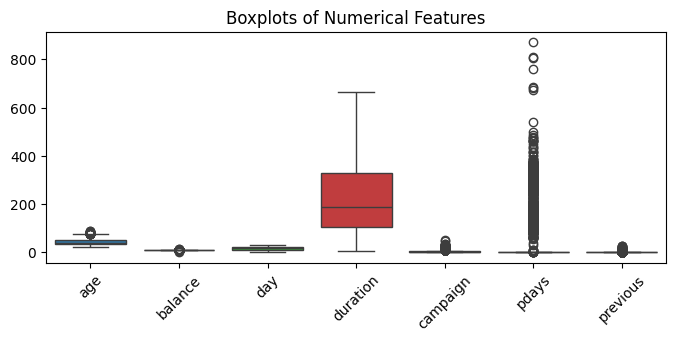

In [39]:
# Plot boxplots for each numerical feature
plt.figure(figsize=(8, 3))
sn.boxplot(data=data.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

In [40]:
# Handle outliers in 'pdays' using IQR
Q1_pdays = data['pdays'].quantile(0.25)
Q3_pdays = data['pdays'].quantile(0.75)
IQR_pdays = Q3_pdays - Q1_pdays

# Cap values beyond 1.5 * IQR for 'pdays'
lower_bound_pdays = Q1_pdays - 1.5 * IQR_pdays
upper_bound_pdays = Q3_pdays + 1.5 * IQR_pdays

data['pdays'] = np.where(data['pdays'] > upper_bound_pdays, upper_bound_pdays,
                         np.where(data['pdays'] < lower_bound_pdays, lower_bound_pdays, data['pdays']))


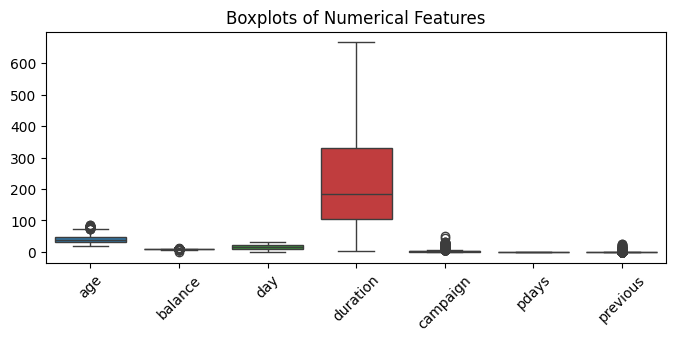

In [41]:
# Plot boxplots for each numerical feature
plt.figure(figsize=(8, 3))
sn.boxplot(data=data.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

In [42]:
# # Separate features and target
X = data.drop('y', axis=1)  # Replace 'y' with the name of the target column
# X = data
y = data['y']

In [45]:
# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target column
y = LabelEncoder().fit_transform(y)

In [46]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=425985)

In [47]:
# Apply StandardScaler to the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# # Apply SMOTE to the training set using the following package: from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy=1, random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # Check the distribution of target classes after SMOTE
# y_train_smote_series = pd.Series(y_train_smote)
# print(y_train_smote_series.value_counts())


In [50]:
# Downsampling the majority class using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_downsampled, y_train_downsampled = rus.fit_resample(X_train, y_train)

In [51]:
# Initialize and train the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_downsampled, y_train_downsampled)

# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
# Predict the target on the test set
y_pred = model.predict(X_test)

In [53]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       801
           1       0.27      0.76      0.39       104

    accuracy                           0.73       905
   macro avg       0.61      0.74      0.61       905
weighted avg       0.88      0.73      0.78       905



In [54]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[583 218]
 [ 25  79]]


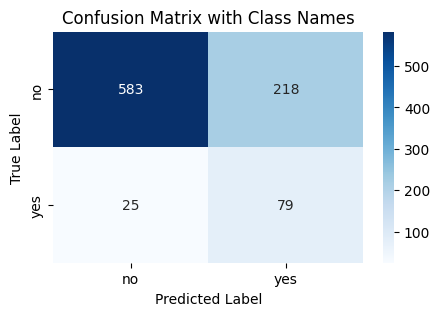

In [55]:
class_names = ['no', 'yes']
plt.figure(figsize=(5, 3))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Class Names')
plt.show()


In [56]:
# Looking at the confusion matrix you've provided, it seems that even after 
# applying SMOTE, the imbalance in correctly predicting the minority class ("yes") persists.

In [57]:
# # Build a Neural Network model
# model = Sequential()
# model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 16 neurons
# model.add(Dense(8, activation='relu'))  # Hidden layer with 8 neurons
# model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# model = Sequential([
#     Dense(16, input_dim=X_train.shape[1], activation='relu'),                 # Input layer with 16 neurons
#     Dense(8, activation='relu'),                                              # Hidden layer with 8 neurons
#     Dense(1, activation='sigmoid')                                            # Output layer for binary classification
# ])

# Neural Network model with L2 Regularization fro improvement 
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),        # Input layer with 16 neurons 
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),                                     # Hidden layer with 8 neurons
    Dense(1, activation='sigmoid')                                                                # Output layer for binary classification
])

/usr/local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
# Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#  adjust the learning rate by modifying the Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to get the number of parameters
model.summary()

# Train the model
# history = model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=10, validation_split=0.2, verbose=1)
history = model.fit(X_train_downsampled, y_train_downsampled, epochs=50, batch_size=10, validation_split=0.2, verbose=1)


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Test Accuracy: {accuracy:.2f}')

# Predict the target on the test set
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Evaluate the model's performance
print('Classification Report:')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5079 - loss: 0.8304 - val_accuracy: 0.3832 - val_loss: 0.8311
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6310 - loss: 0.7535 - val_accuracy: 0.3593 - val_loss: 0.8543
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6932 - loss: 0.6896 - val_accuracy: 0.4012 - val_loss: 0.8571
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7184 - loss: 0.6375 - val_accuracy: 0.4731 - val_loss: 0.8254
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.5788 - val_accuracy: 0.5329 - val_loss: 0.7930
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7643 - loss: 0.5630 - val_accuracy: 0.5629 - val_loss: 0.7786
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7810 - loss: 0.5334 - val_accuracy: 0.6048 - val_loss: 0.7601
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8185 - loss: 0.4805 - val_accuracy: 0.6287 - val_loss:

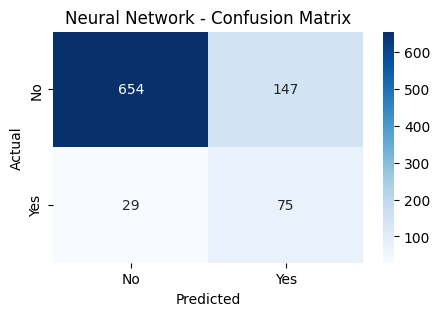

In [59]:
# Plot confusion matrix for Neural Network
cm_nn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sn.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Neural Network - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

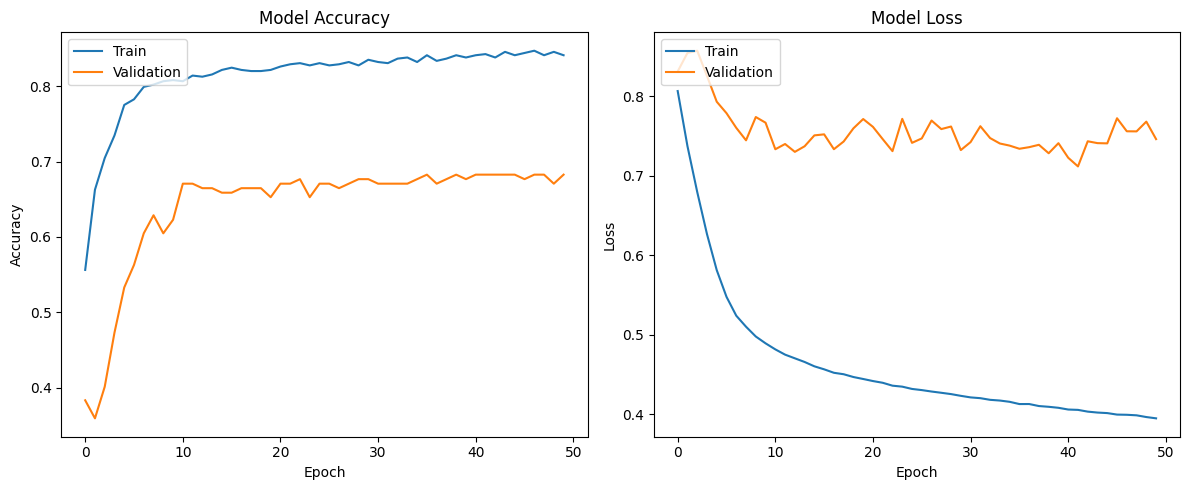

In [60]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Training Logistic Regression with Downsampled Data...
Logistic Regression Accuracy: 0.80
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       801
           1       0.34      0.82      0.48       104

    accuracy                           0.80       905
   macro avg       0.66      0.81      0.68       905
weighted avg       0.90      0.80      0.83       905



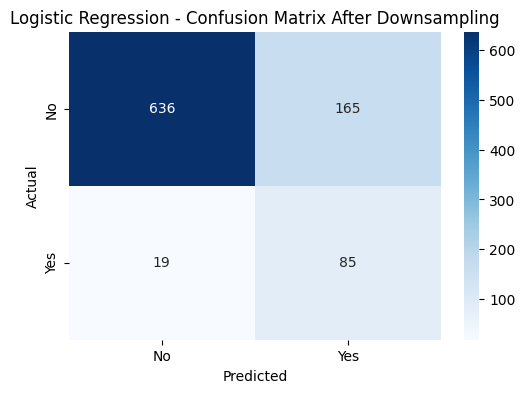


Training Random Forest with Downsampled Data...
Random Forest Accuracy: 0.78
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       801
           1       0.32      0.87      0.47       104

    accuracy                           0.78       905
   macro avg       0.65      0.81      0.66       905
weighted avg       0.90      0.78      0.81       905



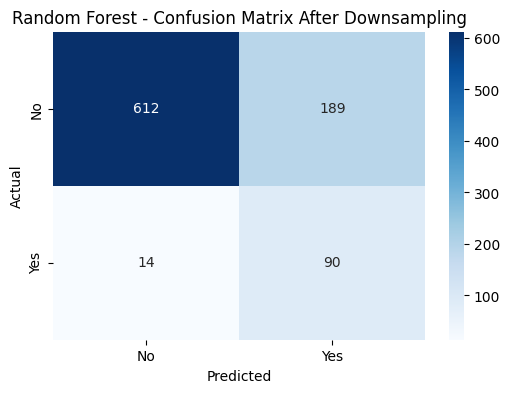


Training SVM with Downsampled Data...
SVM Accuracy: 0.75
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       801
           1       0.30      0.84      0.44       104

    accuracy                           0.75       905
   macro avg       0.63      0.79      0.64       905
weighted avg       0.89      0.75      0.79       905



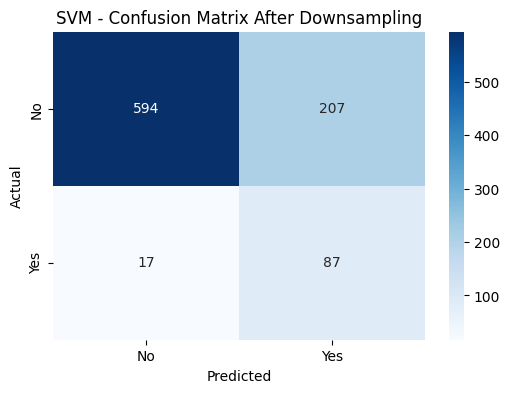


Training K-Nearest Neighbors with Downsampled Data...
K-Nearest Neighbors Accuracy: 0.74
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       801
           1       0.28      0.78      0.41       104

    accuracy                           0.74       905
   macro avg       0.62      0.76      0.62       905
weighted avg       0.88      0.74      0.79       905



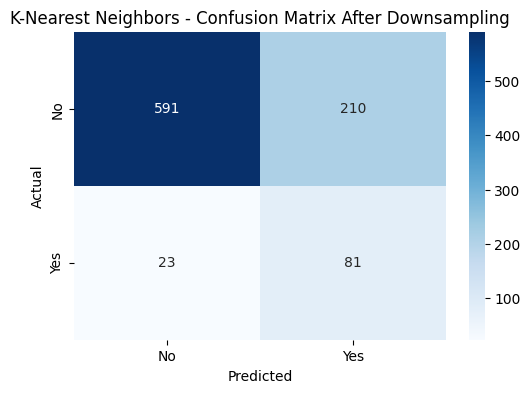


Training Gradient Boosting with Downsampled Data...
Gradient Boosting Accuracy: 0.79
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       801
           1       0.34      0.84      0.48       104

    accuracy                           0.79       905
   macro avg       0.66      0.81      0.68       905
weighted avg       0.90      0.79      0.83       905



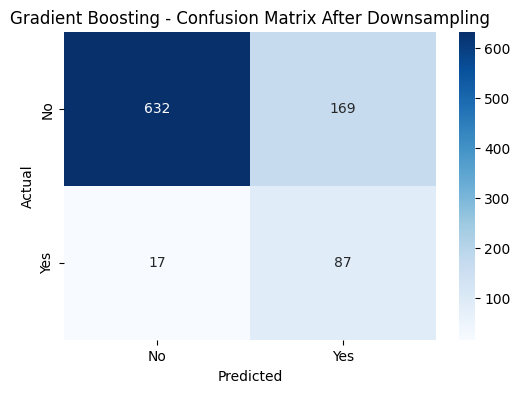

In [61]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# for name, model in models.items():
#     model.fit(X_train_smote, y_train_smote)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f'{name} Accuracy: {accuracy:.2f}')
#     print(f'{name} Classification Report:')
#     print(classification_report(y_test, y_pred))
    
#     # Plot confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     plt.figure(figsize=(5, 3))
#     sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
#     plt.title(f'{name} - Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()


# Fit and evaluate traditional models using downsampled data
for name, model in models.items():
    print(f"\nTraining {name} with Downsampled Data...")
    model.fit(X_train_downsampled, y_train_downsampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(f'{name} Classification Report:')
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'{name} - Confusion Matrix After Downsampling')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

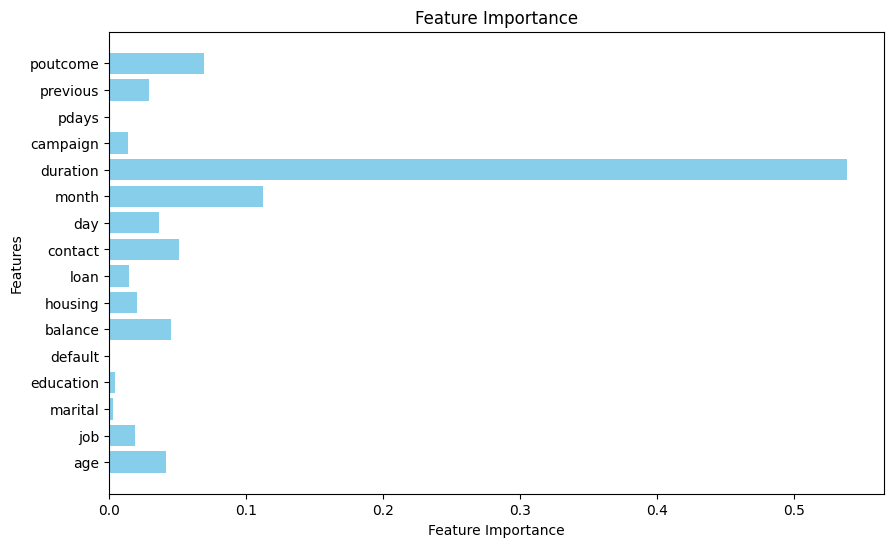

In [62]:
# Extract feature importances
feature_importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

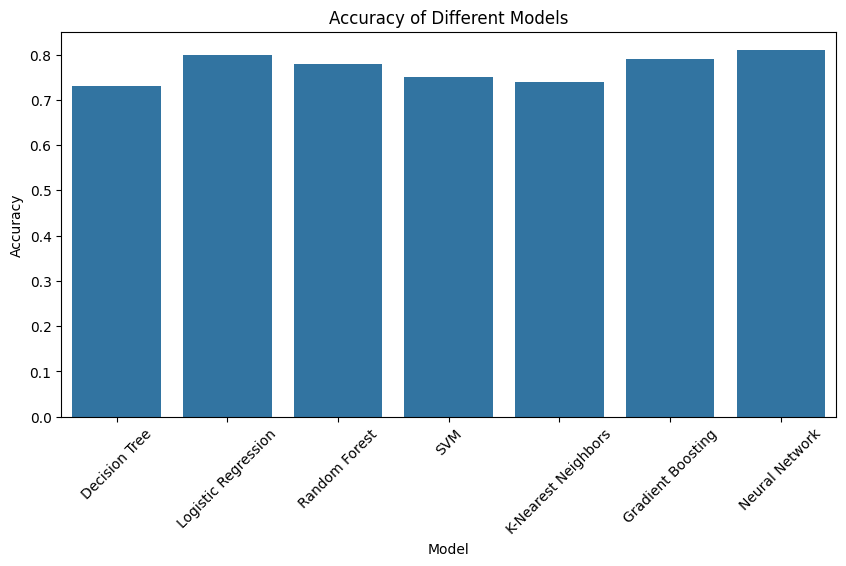

In [63]:
# Plot of the use model
model_names = ["Decision Tree", "Logistic Regression", "Random Forest", "SVM", "K-Nearest Neighbors", "Gradient Boosting", "Neural Network"]
accuracies = [0.73, 0.80, 0.78, 0.75, 0.74, 0.79, 0.81]  # Replace these with actual accuracies obtained

plt.figure(figsize=(10, 5))
sn.barplot(x=model_names, y=accuracies)              
plt.xticks(rotation=45)
plt.title("Accuracy of Different Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()
